In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import files
uploaded = files.upload()

Saving Mobile_test_data.csv to Mobile_test_data.csv


In [29]:
data = pd.read_csv("Mobile_test_data.csv")
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,159,Samsung Galaxy S21,Android,304,6.5,2375,79,1493,51,Male,4
1,501,Google Pixel 5,Android,66,1.3,369,14,195,32,Male,1
2,397,Xiaomi Mi 11,Android,78,1.1,437,14,143,27,Female,1
3,156,Xiaomi Mi 11,Android,158,3.4,893,36,493,32,Male,2
4,322,Google Pixel 5,Android,274,6.0,1489,56,666,57,Female,3


In [30]:
data.shape

(210, 11)

In [31]:
data.duplicated().mean()

np.float64(0.0)

In [32]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,328.704762,264.109524,5.139524,1512.285714,49.371429,890.928571,39.000000,2.938095
std,207.522982,168.774679,2.969721,806.044464,25.762165,602.906048,12.040999,1.376834
min,3.000000,30.000000,1.000000,312.000000,10.000000,111.000000,18.000000,1.000000
25%,142.250000,120.500000,2.400000,730.250000,26.000000,360.500000,28.250000,2.000000
50%,311.500000,226.000000,4.900000,1498.000000,49.000000,824.500000,40.000000,3.000000
75%,517.750000,415.000000,6.975000,2130.750000,69.750000,1238.000000,50.000000,4.000000
max,697.000000,589.000000,11.900000,2993.000000,98.000000,2497.000000,59.000000,5.000000


In [33]:
data['User Behavior Class'].value_counts()

,count
User Behavior Class,
3,50
4,47
1,46
2,34
5,33


/tmp/ipython-input-846516650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['User Behavior Class'], palette='magma')


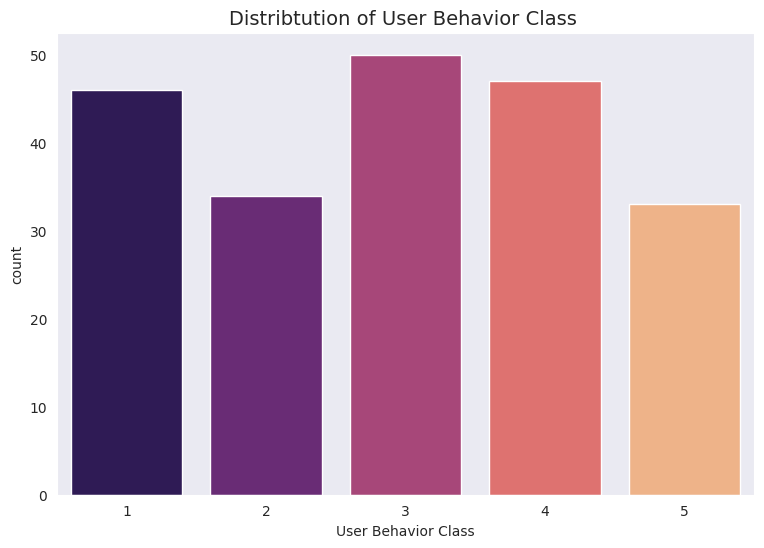

In [34]:
sns.set_style(style='dark')
plt.figure(figsize=(9,6))
plt.title('Distribtution of User Behavior Class ', fontsize=14)
sns.countplot(x=data['User Behavior Class'], palette='magma')
plt.show()

In [35]:
data['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,52
OnePlus 9,46
iPhone 12,45
Samsung Galaxy S21,37
Google Pixel 5,30


In [36]:
data['Gender'].value_counts()


,count
Gender,
Male,105
Female,105


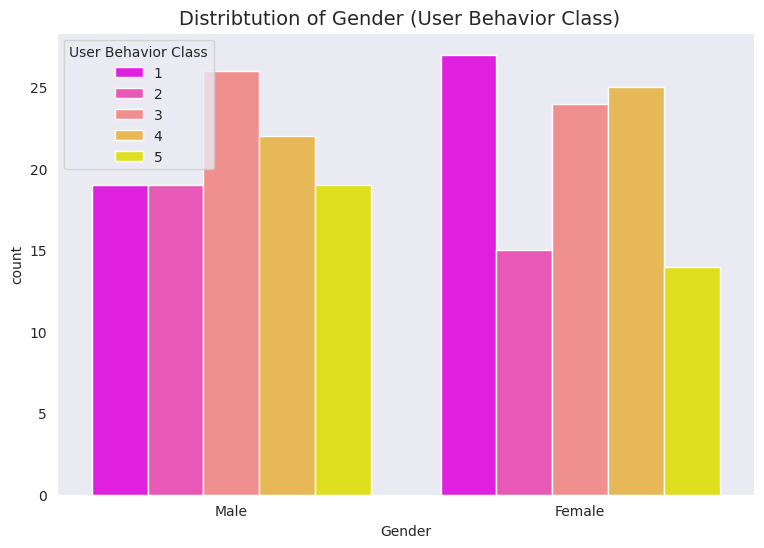

In [37]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Gender (User Behavior Class)  ', fontsize=14)
sns.countplot(x=data['Gender'], palette='spring', hue=data['User Behavior Class'])
plt.show()

In [38]:
data['Operating System'].value_counts()

,count
Operating System,
Android,165
iOS,45


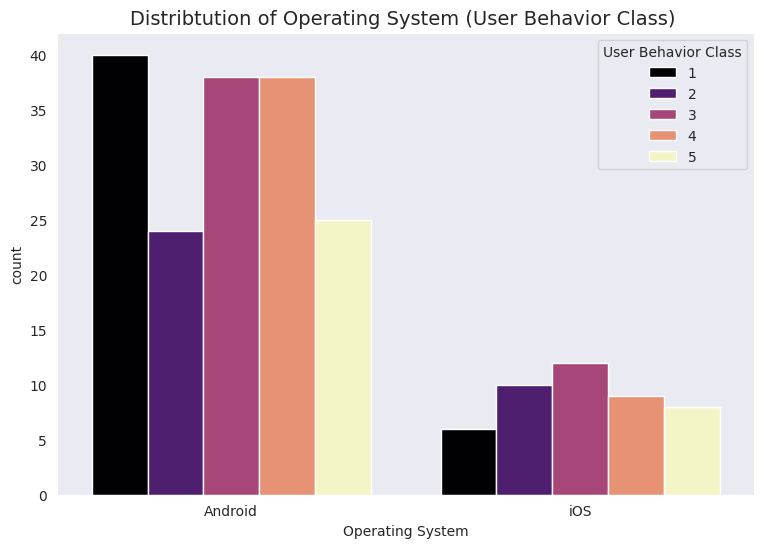

In [39]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Operating System (User Behavior Class) ', fontsize=14)
sns.countplot(x=data['Operating System'], palette='magma', hue=data['User Behavior Class'])
plt.show()

In [40]:
data['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,52
OnePlus 9,46
iPhone 12,45
Samsung Galaxy S21,37
Google Pixel 5,30


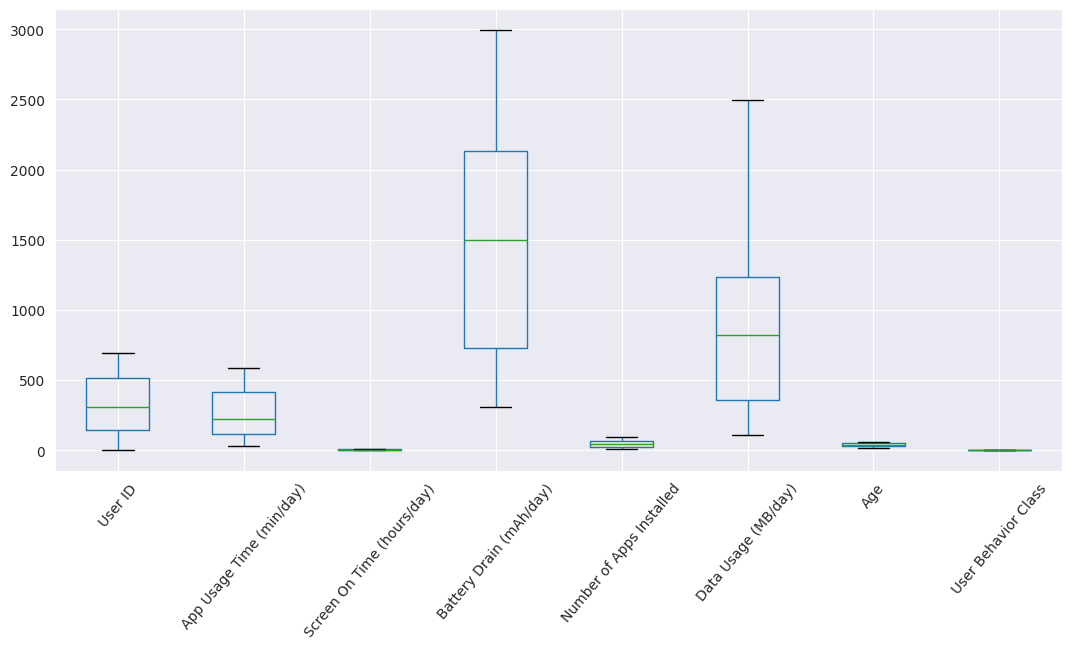

In [41]:
plt.figure(figsize=(13,6))
data.boxplot()
plt.xticks(rotation=50)
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns[data.dtypes=='object']:
    data[col] = le.fit_transform(data[col])




In [43]:
# max get "user behavior class" so chose this!!!
data.corr()['User Behavior Class']

,User Behavior Class
User ID,-0.006227
Device Model,0.015808
Operating System,0.048884
App Usage Time (min/day),0.965266
Screen On Time (hours/day),0.961913
Battery Drain (mAh/day),0.977770
Number of Apps Installed,0.981055
Data Usage (MB/day),0.944227
Age,0.081676
Gender,0.065870


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data.drop(columns=['User Behavior Class']),
                                                           data['User Behavior Class'], test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
accuracy_score(y_test, y_pred2)


1.0

In [47]:

randomforest_report = classification_report(y_test,y_pred2)
print('\n Random Forest Classifier\n', randomforest_report)
print()


 Random Forest Classifier
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42




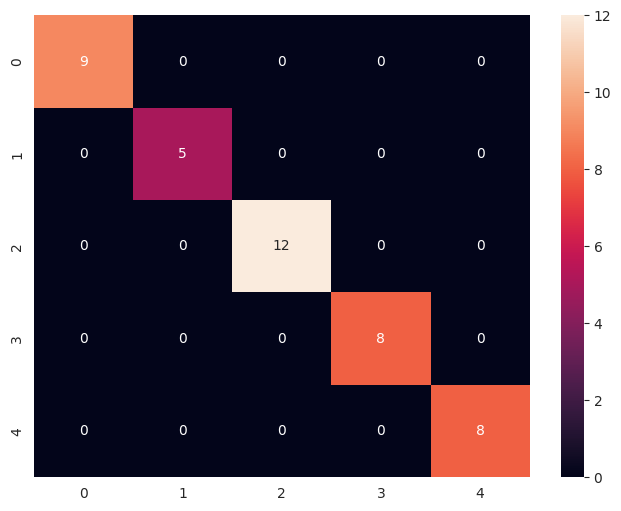

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.show()